# Repeating Analysis of Fischer et al 2011

In [1]:
import numpy as np
import tarfile
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.interpolate as interp
from sys import platform
from astropy.io import fits
from astropy.io import ascii
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from dust_extinction.parameter_averages import F99
import dust_extinction.parameter_averages as de

In [2]:
# %matplotlib notebook  
%matplotlib inline

In [3]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

In [45]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)
dataratio=(alldata_dec02/interp2008(allwav_dec02)).value
ext_dec02=-2.5*np.log10(dataratio)

C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
lines=ascii.read('line_output.txt')

In [46]:
obsratio=np.array([])
for j in range(len(lines['LineLambda'])):
    obsratio=np.append(obsratio,np.average(dataratio[np.abs(allwav_dec02.value-lines['LineLambda'][j]) < 0.01]))

obsratio

array([0.46343356, 0.47759038, 0.53582728, 0.54972851, 0.56160778,
       0.58916599, 0.59546775, 0.61496544, 0.62542897, 0.73048174,
       0.73226362, 0.75445408, 0.75777894, 0.76982111, 0.77868646,
       0.78362906, 0.79610533, 0.79839736, 0.94141626, 0.99275881,
       0.99846518, 1.02975142, 1.04664719, 0.38856286, 0.41996238,
       0.30657381, 0.31074032, 0.29524255, 0.2588577 , 0.25321347,
       0.1912871 , 0.16243079, 0.12527689])

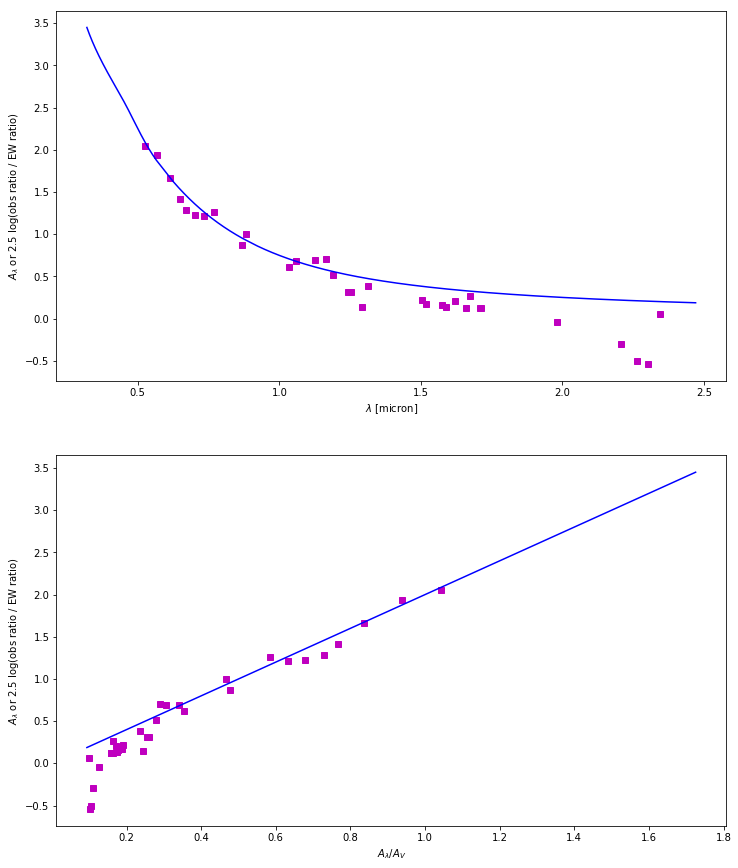

In [60]:
fig,axs=plt.subplots(2,1,figsize=(12,15))


axs[0].plot(lines['LineLambda'],-2.5*np.log10(obsratio*lines['EWratio']),'ms')

ext=de.F99(Rv=3)

axs[0].plot(allwav_2008,2.0*ext(allwav_2008),'b',label='Extinction law AV=2 (F99)')


axs[0].set_xlabel('$\lambda$ [micron]')
axs[0].set_ylabel('$A_\lambda$ or 2.5 log(obs ratio / EW ratio)')



axs[1].plot(ext(lines['LineLambda']*u.micron),-2.5*np.log10(obsratio*lines['EWratio']),'ms')

axs[1].plot(ext(allwav_2008),2.0*ext(allwav_2008),'b',label='Extinction law AV=2 (F99)')

axs[1].set_xlabel('$A_\lambda/A_V$')
axs[1].set_ylabel('$A_\lambda$ or 2.5 log(obs ratio / EW ratio)')



plt.show()